# Collecting Data from Reddit via PRAW - #AITA edition

In this tutorial, we'll explore how to use PRAW (Python Reddit API Wrapper) to collect data from Reddit. We'll cover different functionalities of the Reddit API, including fetching posts, comments, submitting new posts, voting, and more. Throughout the tutorial, we'll use a real-life example by collecting data from the subreddit r/worldnews.

You can install PRAW using pip, the Python package manager:

In [1]:
import praw

## Authenticating with Reddit API

To use the Reddit API, you need to authenticate with Reddit's servers. You can create a Reddit application on Reddit's website and obtain your client ID, client secret, and user agent.

In [2]:
reddit = praw.Reddit(client_id='your_client_id',
                     client_secret='your_client_secret',
                     user_agent='your_user_agent')

reddit = praw.Reddit(
    client_id="gZxgskOulzqLAjaAyIuymg",
    client_secret="om28v8YqF4G4JScpMpZXkS8jfBRNvg",
    user_agent="sds komex 2024 tutorial",
    ratelimit_seconds=300
)

## Fetching Posts

You can fetch posts from Reddit using PRAW. For example, to fetch the top posts from a subreddit:

In [3]:
subreddit = reddit.subreddit('AmItheAsshole')
top_posts = list(subreddit.top(limit=5)) # convert the generator to list

for post in top_posts:
    print(post.title)

AITA for telling my wife the lock on my daughter's door does not get removed til my brother inlaw and his daughters are out of our house?
META: This sub is moving towards a value system that frequently doesn't align with the rest of the world
UPDATE, AITA for despising my mentally handicap sister?
AITA For suing my girlfriend after she had my 1967 impala project taken to the scrapyard?
UPDATE: AITA for wanting to go to the funeral of a girl that I helped get addicted to drugs?


In [4]:
vars(top_posts[0])

{'comment_limit': 2048,
 'comment_sort': 'confidence',
 '_reddit': <praw.reddit.Reddit at 0x7fb57e399540>,
 'approved_at_utc': None,
 'subreddit': Subreddit(display_name='AmItheAsshole'),
 'selftext': 'My brother in-law (Sammy) lost his home shortly after his divorce 10 months ago. He moved in with us and brought his twin daughters (Olivia & Sloane18) with him a couple of months ago.\nHis sister (my wife) and I have one daughter (Zoey 16) and she and her cousins aren\'t close but get along fine.\n\nOlivia & Sloane have no respect for Zoey\'s privacy, none. they used to walk into her room and take everything they get their hands on. Makeup, phone accessories, clothes, school laptop etc. Zoey complained a lot and I\'ve already asked the girls to respect Zoey\'s privacy and stop taking things. My wife and Sammy saw no issue with this. After all, they\'re girls and this\'s typical teenage girls behavior. I completely disagreed. \n\nLast straw was when Zoey bought a 60$ m.a.c makeup-kit tha

### which attributes do posts have?

You can find all attributes here: https://praw.readthedocs.io/en/stable/code_overview/models/submission.html

In [5]:
top_posts[0]

Submission(id='ocx94s')

In [6]:
top_posts[0].selftext

'My brother in-law (Sammy) lost his home shortly after his divorce 10 months ago. He moved in with us and brought his twin daughters (Olivia & Sloane18) with him a couple of months ago.\nHis sister (my wife) and I have one daughter (Zoey 16) and she and her cousins aren\'t close but get along fine.\n\nOlivia & Sloane have no respect for Zoey\'s privacy, none. they used to walk into her room and take everything they get their hands on. Makeup, phone accessories, clothes, school laptop etc. Zoey complained a lot and I\'ve already asked the girls to respect Zoey\'s privacy and stop taking things. My wife and Sammy saw no issue with this. After all, they\'re girls and this\'s typical teenage girls behavior. I completely disagreed. \n\nLast straw was when Zoey bought a 60$ m.a.c makeup-kit that looks like a paintset that she saved up for over a month and one of the girls, Sloane took it without permission and ruined it by mixing shades together while using it. Don\'t know much about makeup 

In [7]:
top_posts[0].num_comments

5259

In [8]:
top_posts[0].score

81020

In [9]:
top_posts[0].upvote_ratio

0.92

## Searching for Posts

You can search for posts using specific keywords:

In [12]:
wife_posts = list(reddit.subreddit('AmItheAsshole').search('wife', limit=20))

for post in wife_posts:
    print(post.title)

AITA for leaving equal inheritance to kids from my wife and ex wife? My wife is a SAHM.
AITA for telling my[29f] husband[34m] not to call his ex-wife his wife?
AITA for calling a trophy wife a trophy wife?
AITA for refusing to help my wife and her friend anymore over what my wife calls a miscommunication?
WIBTA if I told my wife that her brother, wife and baby cannot visit us for 2 weeks?
AITA for "pregaming" my wife's dinners?
AITA for asking my friend to move a picture of him and his wife because it made my wife uncomfortable?
AITA? my wife thinks so.
AITA for telling my wife to return it all
AITA for not helping my wife around the house?
AITA for not telling my wife that my sister died?
AITA for correcting my wife’s grammar
AITAH for thinking my wife lied to me
AITA? I talked to my wife’s boss about her being overworked. Now my wife is yelling at me about never trusting me again.
AITA for taking my wife's side?
AITA for Telling my wife's mom that my wife haven't showered for 5 weeks

## Fetch comments from a subreddit post

In [13]:
link = wife_posts[0].permalink
link

'/r/AmItheAsshole/comments/14o449y/aita_for_leaving_equal_inheritance_to_kids_from/'

In [17]:
submission = reddit.submission(url='https://www.reddit.com' + link)
submission.comments.replace_more(limit=5)  # Replace MoreComments objects with their children
for comment in submission.comments.list():
    print(comment.body)

Welcome to /r/AmITheAsshole. Please view our [voting guide here](https://www.reddit.com/r/AmItheAsshole/wiki/faq#wiki_what.2019s_with_these_acronyms.3F_what_do_they_mean.3F), and remember to use **only one** judgement in your comment.

OP has offered the following explanation for why they think they might be the asshole:

 > (1) diving money that belongs to me and my wife to children that are not hers
(2) i seem to be invalidating my wife’s labor and the ‘compensation’ she feels she deserves.

Help keep the sub engaging!

#Don’t downvote assholes!

Do upvote interesting posts!

 [Click Here For Our Rules](https://www.reddit.com/r/AmItheAsshole/about/rules) and [Click Here For Our FAQ](https://www.reddit.com/r/AmItheAsshole/wiki/faq)

##Subreddit Announcement

###[The Asshole Universe is Expanding, Again: Introducing Another New Sister Subreddit!](https://www.reddit.com/r/AmItheAsshole/comments/128nbp3/the_asshole_universe_is_expanding_again/)

Follow the link above to learn more

 ---


## Fetch information about subreddit posts

In [18]:
subreddit = reddit.subreddit('AmItheAsshole')
for post in subreddit.hot(limit=5):  # Fetch 5 hot posts from the subreddit
    print("Title:", post.title)
    print("Score:", post.score)
    print("Number of Comments:", post.num_comments)
    print("URL:", post.url)
    print("Author:", post.author)
    print("-" * 50)

Title: AITA Monthly Open Forum February 2024: Flair
Score: 106
Number of Comments: 156
URL: https://www.reddit.com/r/AmItheAsshole/comments/1aghz0l/aita_monthly_open_forum_february_2024_flair/
Author: AITAMod
--------------------------------------------------
Title: AITA for making my wife cry several times over work?
Score: 1035
Number of Comments: 490
URL: https://www.reddit.com/r/AmItheAsshole/comments/1b15jv0/aita_for_making_my_wife_cry_several_times_over/
Author: New_Calligrapher_255
--------------------------------------------------
Title: AITA for thinking my sister was joking about her daughter's name?
Score: 437
Number of Comments: 335
URL: https://www.reddit.com/r/AmItheAsshole/comments/1b184ku/aita_for_thinking_my_sister_was_joking_about_her/
Author: Happy_Guarantee_1911
--------------------------------------------------
Title: AITA for Asking My Niece to Stop Speaking French Around My Dyslexic Wife?
Score: 2261
Number of Comments: 883
URL: https://www.reddit.com/r/AmItheAss

## Fetch details about a Reddit user

In [19]:
redditor = reddit.redditor('New_Calligrapher_255')  # Replace 'spez' with the username of the user you want to fetch details for
print("Username:", redditor.name)
print("Cake Day:", redditor.created_utc)
print("Comment Karma:", redditor.comment_karma)
print("Link Karma:", redditor.link_karma)

Username: New_Calligrapher_255
Cake Day: 1709016051.0
Comment Karma: 1701
Link Karma: 276


### Visualizing number of posts over time

In [20]:
hubby_posts = list(reddit.subreddit('AmItheAsshole').search('husband', limit=1000))
wife_posts = list(reddit.subreddit('AmItheAsshole').search('wife', limit=1000))

In [21]:
len(hubby_posts), len(wife_posts)

(237, 235)

In [22]:
hubby_posts[-1].selftext

'My husband (38M) and I (38F) have three kids (6, 3, and 1).  His job requires him to travel a fair amount, which means I am home by myself with the kids for at least one week out of each month (sometimes it’s two). Next week, a friend he hasn’t seen in several years who lives on the other side of the country from us will be about five hours from where we live. My husband has decided to take three days off work and drive down to see his friend. The morning after he returns from that visit with his friend, he is scheduled to leave for a week-long work trip.\n \nWhen he decided to drive down to see his friend, he suggested that the kids and I go as well. This seems like a terrible idea to me for a few reasons. First, our oldest is in school, so it would mean pulling her out for three days. Second, he and his friend have plans to play golf all day on two of the days. So I’d be by myself with the kids, in a town where the only real attraction (the beach) is going to be too chilly for the k

In [23]:
vars(hubby_posts[-1])

{'comment_limit': 2048,
 'comment_sort': 'confidence',
 '_reddit': <praw.reddit.Reddit at 0x7fb57e399540>,
 'approved_at_utc': None,
 'subreddit': Subreddit(display_name='AmItheAsshole'),
 'selftext': 'My husband (38M) and I (38F) have three kids (6, 3, and 1).  His job requires him to travel a fair amount, which means I am home by myself with the kids for at least one week out of each month (sometimes it’s two). Next week, a friend he hasn’t seen in several years who lives on the other side of the country from us will be about five hours from where we live. My husband has decided to take three days off work and drive down to see his friend. The morning after he returns from that visit with his friend, he is scheduled to leave for a week-long work trip.\n \nWhen he decided to drive down to see his friend, he suggested that the kids and I go as well. This seems like a terrible idea to me for a few reasons. First, our oldest is in school, so it would mean pulling her out for three days. 

let's put some of this information into dataframe formats

In [24]:
import pandas as pd

In [25]:
def post_to_df(posts):
    posts_for_df = []
    for post in posts:
        posts_for_df.append(vars(post))
    return pd.DataFrame(posts_for_df)

In [30]:
hubby_df = post_to_df(hubby_posts)
wife_df = post_to_df(wife_posts)

In [27]:
# let's take a subset of columns
wife_df[['subreddit', 'title', 'selftext', 'created_utc']]

subreddit                                              title  \
0    AmItheAsshole  AITA for leaving equal inheritance to kids fro...   
1    AmItheAsshole  AITA for telling my[29f] husband[34m] not to c...   
2    AmItheAsshole      AITA for calling a trophy wife a trophy wife?   
3    AmItheAsshole  AITA for refusing to help my wife and her frie...   
4    AmItheAsshole  WIBTA if I told my wife that her brother, wife...   
..             ...                                                ...   
230  AmItheAsshole  AITA for telling my wife it’s ridiculous to cr...   
231  AmItheAsshole  AITA for telling my wife she is neglecting our...   
232  AmItheAsshole  AITA for not giving my wife who doesn't work m...   
233  AmItheAsshole         AITA for setting a "pee trap" for my wife?   
234  AmItheAsshole  AITA for not helping my wife get ready in the ...   

                                              selftext   created_utc  
0    I’ve two boys with my ex wife and a boy and a ...  1.688242e+09  
1    So my husband (Daniel for privacy) and I have ...  1.693177e+09  
2    My older brother was married briefly and it di...  1.665684e+09  
3    [Update](https://www.reddit.com/user/Grand-Gra...  1.684861e+09  
4    My wife and I live on a seasonal tourist islan...  1.691243e+09  
..                                                 ...           ...  
230  My wife is four months pregnant with our fifth...  1.659635e+09  
231   I(m23) am married to my wife, Dana (F 25). I ...  1.652665e+09  
232  I(m27) can't help but feel like an asshole abo...  1.667903e+09  
233  Hello everyone. I'm a 39 year old man and am m...  1.607404e+09  
234  I'm currently out of work so I stay home with ...  1.705524e+09  

[235 rows x 4 columns]

In [28]:
wife_posts[0].created_utc

1688241521.0

this is a UNIX timestamp: https://www.unixtimestamp.com/

In [31]:
# let's concatenate these two dataframes vertically

reddit_df = pd.concat([hubby_df, wife_df], axis = 0).reset_index()
reddit_df

index  comment_limit comment_sort  \
0        0           2048   confidence   
1        1           2048   confidence   
2        2           2048   confidence   
3        3           2048   confidence   
4        4           2048   confidence   
..     ...            ...          ...   
467    230           2048   confidence   
468    231           2048   confidence   
469    232           2048   confidence   
470    233           2048   confidence   
471    234           2048   confidence   

                                           _reddit approved_at_utc  \
0    <praw.reddit.Reddit object at 0x7fb57e399540>            None   
1    <praw.reddit.Reddit object at 0x7fb57e399540>            None   
2    <praw.reddit.Reddit object at 0x7fb57e399540>            None   
3    <praw.reddit.Reddit object at 0x7fb57e399540>            None   
4    <praw.reddit.Reddit object at 0x7fb57e399540>            None   
..                                             ...             ...   
467  <praw.reddit.Reddit object at 0x7fb57e399540>            None   
468  <praw.reddit.Reddit object at 0x7fb57e399540>            None   
469  <praw.reddit.Reddit object at 0x7fb57e399540>            None   
470  <praw.reddit.Reddit object at 0x7fb57e399540>            None   
471  <praw.reddit.Reddit object at 0x7fb57e399540>            None   

         subreddit                                           selftext  \
0    AmItheAsshole  I have a weird situation. It's become very cle...   
1    AmItheAsshole  I am a 28-year-old woman, and have been marrie...   
2    AmItheAsshole  \nI f23 found out that I was pregnant very rec...   
3    AmItheAsshole  Our son is 2 and right now he’s going through ...   
4    AmItheAsshole  I have been with my husband for 10 years. We h...   
..             ...                                                ...   
467  AmItheAsshole  My wife is four months pregnant with our fifth...   
468  AmItheAsshole   I(m23) am married to my wife, Dana (F 25). I ...   
469  AmItheAsshole  I(m27) can't help but feel like an asshole abo...   
470  AmItheAsshole  Hello everyone. I'm a 39 year old man and am m...   
471  AmItheAsshole  I'm currently out of work so I stay home with ...   

    author_fullname  saved mod_reason_title  ...  subreddit_subscribers  \
0       t2_81149ujg  False             None  ...               14523189   
1       t2_cc6r6up1  False             None  ...               14523189   
2       t2_lw0hhken  False             None  ...               14523189   
3      t2_gaed2upu2  False             None  ...               14523189   
4       t2_u2beg2ks  False             None  ...               14523189   
..              ...    ...              ...  ...                    ...   
467     t2_g3mpxsy0  False             None  ...               14523185   
468     t2_fgo0tfvi  False             None  ...               14523185   
469     t2_u1y7c5j5  False             None  ...               14523185   
470     t2_97w1qrxf  False             None  ...               14523185   
471     t2_im45t3p4  False             None  ...               14523185   

      created_utc num_crossposts media is_video  _fetched  \
0    1.599645e+09              5  None    False     False   
1    1.622001e+09              3  None    False     False   
2    1.649854e+09              3  None    False     False   
3    1.690640e+09              3  None    False     False   
4    1.667843e+09              4  None    False     False   
..            ...            ...   ...      ...       ...   
467  1.659635e+09              6  None    False     False   
468  1.652665e+09              0  None    False     False   
469  1.667903e+09              1  None    False     False   
470  1.607404e+09              3  None    False     False   
471  1.705524e+09              1  None    False     False   

     _additional_fetch_params _comments_by_id  call_to_action author_cakeday  
0                          {}              {}             NaN        

In [33]:
len(hubby_df) + len(wife_df)

472

Let's try to convert this to a human-interpretable time and date

In [34]:
# to make interpreting the date easier, let's convert it to human-readable form

reddit_df['created'] = pd.to_datetime(reddit_df['created_utc'], utc=True, unit='s')
reddit_df[['subreddit', 'title', 'selftext', 'created_utc', 'created']]

subreddit                                              title  \
0    AmItheAsshole  AITA for not allowing my husband to be the ent...   
1    AmItheAsshole  AITA for not calling my husband "my honored hu...   
2    AmItheAsshole  AITA for yelling at my husband's mother for an...   
3    AmItheAsshole  AITA for telling my husband’s cousins if they ...   
4    AmItheAsshole  AITA for telling my niece my husband and I are...   
..             ...                                                ...   
467  AmItheAsshole  AITA for telling my wife it’s ridiculous to cr...   
468  AmItheAsshole  AITA for telling my wife she is neglecting our...   
469  AmItheAsshole  AITA for not giving my wife who doesn't work m...   
470  AmItheAsshole         AITA for setting a "pee trap" for my wife?   
471  AmItheAsshole  AITA for not helping my wife get ready in the ...   

                                              selftext   created_utc  \
0    I have a weird situation. It's become very cle...  1.599645e+09   
1    I am a 28-year-old woman, and have been marrie...  1.622001e+09   
2    \nI f23 found out that I was pregnant very rec...  1.649854e+09   
3    Our son is 2 and right now he’s going through ...  1.690640e+09   
4    I have been with my husband for 10 years. We h...  1.667843e+09   
..                                                 ...           ...   
467  My wife is four months pregnant with our fifth...  1.659635e+09   
468   I(m23) am married to my wife, Dana (F 25). I ...  1.652665e+09   
469  I(m27) can't help but feel like an asshole abo...  1.667903e+09   
470  Hello everyone. I'm a 39 year old man and am m...  1.607404e+09   
471  I'm currently out of work so I stay home with ...  1.705524e+09   

                      created  
0   2020-09-09 09:54:35+00:00  
1   2021-05-26 03:55:10+00:00  
2   2022-04-13 12:45:38+00:00  
3   2023-07-29 14:12:23+00:00  
4   2022-11-07 17:40:54+00:00  
..                        ...  
467 2022-08-04 17:46:57+00:00  
468 2022-05-16 01:28:57+00:00  
469 2022-11-08 10:18:55+00:00  
470 2020-12-08 05:03:22+00:00  
471 2024-01-17 20:31:46+00:00  

[472 rows x 5 columns]

let's aggregate the posts on a monthly basis

In [35]:
reddit_time_df = reddit_df.set_index('created')

post_counts = reddit_time_df.resample('M').size()

In [36]:
post_counts

created
2019-08-31 00:00:00+00:00     1
2019-09-30 00:00:00+00:00     1
2019-10-31 00:00:00+00:00     0
2019-11-30 00:00:00+00:00     0
2019-12-31 00:00:00+00:00     0
2020-01-31 00:00:00+00:00     0
2020-02-29 00:00:00+00:00     2
2020-03-31 00:00:00+00:00     0
2020-04-30 00:00:00+00:00     0
2020-05-31 00:00:00+00:00     1
2020-06-30 00:00:00+00:00     0
2020-07-31 00:00:00+00:00     1
2020-08-31 00:00:00+00:00     0
2020-09-30 00:00:00+00:00     2
2020-10-31 00:00:00+00:00     0
2020-11-30 00:00:00+00:00     2
2020-12-31 00:00:00+00:00     2
2021-01-31 00:00:00+00:00     0
2021-02-28 00:00:00+00:00     0
2021-03-31 00:00:00+00:00     2
2021-04-30 00:00:00+00:00     3
2021-05-31 00:00:00+00:00     4
2021-06-30 00:00:00+00:00     0
2021-07-31 00:00:00+00:00     0
2021-08-31 00:00:00+00:00     1
2021-09-30 00:00:00+00:00     3
2021-10-31 00:00:00+00:00     6
2021-11-30 00:00:00+00:00     6
2021-12-31 00:00:00+00:00     5
2022-01-31 00:00:00+00:00     9
2022-02-28 00:00:00+00:00    14


let's visualize these two

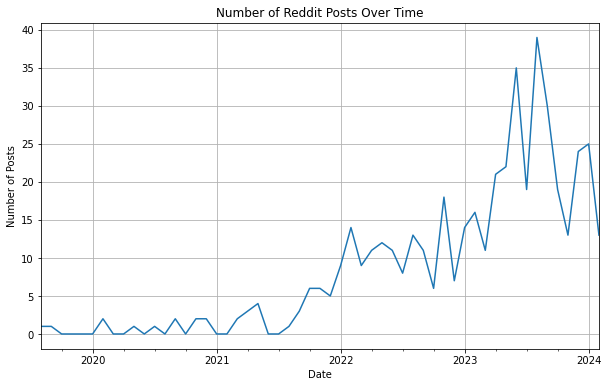

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
post_counts.plot()
plt.title('Number of Reddit Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

### Ex 1: How do we get two separate lines for the two queries?

In [38]:
hubby_df['query'] = ['husband'] * len(hubby_df)
wife_df['query'] = ['wife'] * len(wife_df)
reddit_df = pd.concat([hubby_df, wife_df], axis = 0).reset_index()
reddit_df['created'] = pd.to_datetime(reddit_df['created_utc'], utc=True, unit='s')
reddit_df[['subreddit', 'title', 'selftext', 'created_utc', 'created', 'query']]

subreddit                                              title  \
0    AmItheAsshole  AITA for not allowing my husband to be the ent...   
1    AmItheAsshole  AITA for not calling my husband "my honored hu...   
2    AmItheAsshole  AITA for yelling at my husband's mother for an...   
3    AmItheAsshole  AITA for telling my husband’s cousins if they ...   
4    AmItheAsshole  AITA for telling my niece my husband and I are...   
..             ...                                                ...   
467  AmItheAsshole  AITA for telling my wife it’s ridiculous to cr...   
468  AmItheAsshole  AITA for telling my wife she is neglecting our...   
469  AmItheAsshole  AITA for not giving my wife who doesn't work m...   
470  AmItheAsshole         AITA for setting a "pee trap" for my wife?   
471  AmItheAsshole  AITA for not helping my wife get ready in the ...   

                                              selftext   created_utc  \
0    I have a weird situation. It's become very cle...  1.599645e+09   
1    I am a 28-year-old woman, and have been marrie...  1.622001e+09   
2    \nI f23 found out that I was pregnant very rec...  1.649854e+09   
3    Our son is 2 and right now he’s going through ...  1.690640e+09   
4    I have been with my husband for 10 years. We h...  1.667843e+09   
..                                                 ...           ...   
467  My wife is four months pregnant with our fifth...  1.659635e+09   
468   I(m23) am married to my wife, Dana (F 25). I ...  1.652665e+09   
469  I(m27) can't help but feel like an asshole abo...  1.667903e+09   
470  Hello everyone. I'm a 39 year old man and am m...  1.607404e+09   
471  I'm currently out of work so I stay home with ...  1.705524e+09   

                      created    query  
0   2020-09-09 09:54:35+00:00  husband  
1   2021-05-26 03:55:10+00:00  husband  
2   2022-04-13 12:45:38+00:00  husband  
3   2023-07-29 14:12:23+00:00  husband  
4   2022-11-07 17:40:54+00:00  husband  
..                        ...      ...  
467 2022-08-04 17:46:57+00:00     wife  
468 2022-05-16 01:28:57+00:00     wife  
469 2022-11-08 10:18:55+00:00     wife  
470 2020-12-08 05:03:22+00:00     wife  
471 2024-01-17 20:31:46+00:00     wife  

[472 rows x 6 columns]

In [39]:
query_dfs = {}
for name, group in reddit_df.groupby('query'):
    temp_df = group.set_index('created')
    query_dfs[name] = temp_df.resample('M').size()

In [40]:
query_dfs

{'husband': created
 2020-02-29 00:00:00+00:00     2
 2020-03-31 00:00:00+00:00     0
 2020-04-30 00:00:00+00:00     0
 2020-05-31 00:00:00+00:00     1
 2020-06-30 00:00:00+00:00     0
 2020-07-31 00:00:00+00:00     1
 2020-08-31 00:00:00+00:00     0
 2020-09-30 00:00:00+00:00     1
 2020-10-31 00:00:00+00:00     0
 2020-11-30 00:00:00+00:00     1
 2020-12-31 00:00:00+00:00     0
 2021-01-31 00:00:00+00:00     0
 2021-02-28 00:00:00+00:00     0
 2021-03-31 00:00:00+00:00     2
 2021-04-30 00:00:00+00:00     0
 2021-05-31 00:00:00+00:00     3
 2021-06-30 00:00:00+00:00     0
 2021-07-31 00:00:00+00:00     0
 2021-08-31 00:00:00+00:00     1
 2021-09-30 00:00:00+00:00     0
 2021-10-31 00:00:00+00:00     4
 2021-11-30 00:00:00+00:00     4
 2021-12-31 00:00:00+00:00     2
 2022-01-31 00:00:00+00:00     5
 2022-02-28 00:00:00+00:00     8
 2022-03-31 00:00:00+00:00     8
 2022-04-30 00:00:00+00:00     6
 2022-05-31 00:00:00+00:00     8
 2022-06-30 00:00:00+00:00     6
 2022-07-31 00:00:00+00

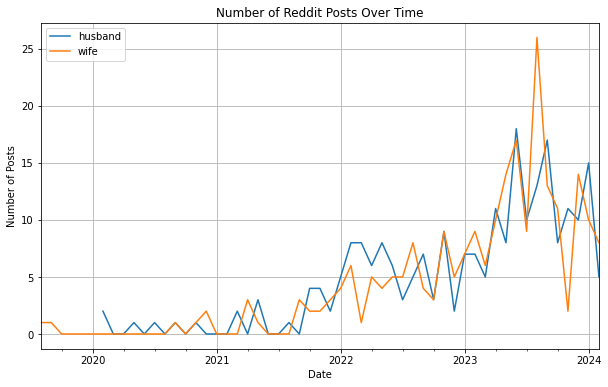

In [41]:
plt.figure(figsize=(10, 6))

for query in query_dfs:
    query_dfs[query].plot(label = query)

plt.title('Number of Reddit Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.legend()
plt.show()